In [1]:
from IPython.display import clear_output

In [2]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

%pip install torch
%pip install torchvision
%pip install matplotlib

clear_output()

In [3]:
import torch
import torch.nn as nn

from torchvision.datasets import CIFAR10
from torchvision.transforms.functional import to_tensor, to_pil_image, resize

from torch.utils.data import DataLoader
from torch.optim import Adam

import matplotlib.pyplot as plt

# Contents:

Make a classifier for CIFAR10 dataset in pytorch using CNN architecture. Make sure to show performance of your model on UNSEEN dataset after training.

About CIFAR10:

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

![CIFAR-10 image](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

# Downloading the dataset

In [4]:
dataset_root = 'data/'

train_dataset = CIFAR10(root=dataset_root, train=True, download=True, transform=to_tensor)
val_dataset = CIFAR10(root=dataset_root, train=False, download=True, transform=to_tensor)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
print('Length of train_dataset is', len(train_dataset))
print('Length of val_dataset is'  , len(val_dataset))

Length of train_dataset is 50000
Length of val_dataset is 10000


## Let's visualize the images and it's channels

torch.Size([3, 250, 250])
Number of channels in test_image:  3


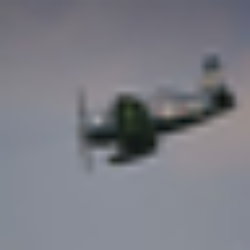

In [7]:
random_img_idx = torch.randint(0, 1000, (1,)).item()

test_image = train_dataset[random_img_idx][0]  # 0 for image part in (image, label) tuple.
test_image = resize(test_image, (250, 250), antialias=None)  # better visualization
print(test_image.shape)
print('Number of channels in test_image: ', test_image.shape[0])
to_pil_image(test_image)

In [8]:
tred, tgreen, tblue = test_image
empty_channel = torch.zeros_like(tred)

tred = [tred, empty_channel, empty_channel]  #R00
tgreen = [empty_channel, tgreen, empty_channel]  #0G0
tblue = [empty_channel, empty_channel, tblue]  #00B

channels = [torch.stack(img) for img in [tred, tgreen, tblue]]

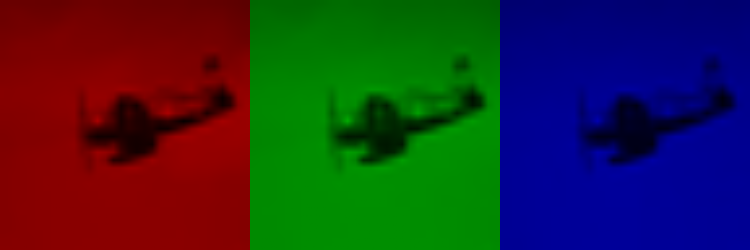

In [9]:
to_pil_image(torch.cat(channels, dim=2))

## Solve here

Define and train a CNN classifier for Ciphar-10 Dataset

### Show performance of model on test data